# Daily News for Stock Market Prediction

Determine if the news affect the stock market.

## A. Data Exploration/Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Open file and inspect first five rows.
df_A = pd.read_csv('Combined_News_DJIA.csv')
df_A.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

The features Top1 to Top25 represent the top-ranked news headlines as voted by users in the Reddit World News Channel. The date feature is the date the news were reported, and the label feature represents stock market movement on that day, with 1 being positive or neutral and 0, negative.

In [3]:
# Create features that concatenates the columns and returns the text length.
df_A['combined_text'] = df_A.iloc[:,2:27].apply(lambda x: ''.join((x).astype(str)), axis=1)
df_A['text_length'] = df_A['combined_text'].apply(len)

In [4]:
# Create a feature that determines text sentiment.
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df_A['sentiment_score'] = df_A['combined_text'].apply(lambda y: sia.polarity_scores(y)['compound'])
df_A['sentiment'] = df_A['sentiment_score'].apply(lambda z: 'positive' if z >= 0 else 'negative')

C:\Users\James\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
# Show the updated dataframe.
df_A.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top20,Top21,Top22,Top23,Top24,Top25,combined_text,text_length,sentiment_score,sentiment
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",2342,-0.9966,negative
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,1643,-0.9075,negative
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...,2137,-0.9739,negative
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...,2028,-0.9842,negative
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Georgian TV reporter shot by Russian sniper ...,b'Saudi Arabia: Mother moves to block child ma...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,b'All the experts admit that we should legalis...,18

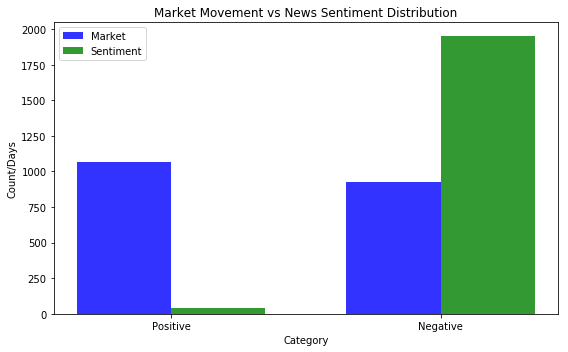

In [6]:
# Plot market movement vs. news sentiment.
n_groups = 2
mark_cat = (df_A['Label'].value_counts()[1], df_A['Label'].value_counts()[0])
news_cat = (df_A['sentiment'].value_counts()['positive'], df_A['sentiment'].value_counts()['negative'])
 
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, mark_cat, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Market')
 
rects2 = plt.bar(index + bar_width, news_cat, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Sentiment')
 
plt.xlabel('Category')
plt.ylabel('Count/Days')
plt.title('Market Movement vs News Sentiment Distribution')
plt.xticks(index + 1/2*bar_width, ('Positive', 'Negative'))
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Show proportion.
print('Positive market days: ', (df_A['Label'] == 1).mean())
print('Positive news sentiment: ', (df_A['sentiment'] == 'positive').mean())
print('Negative market days: ', (df_A['Label'] == 0).mean())
print('Negative news sentiment: ', (df_A['sentiment'] == 'negative').mean())

Positive market days:  0.53544494721
Positive news sentiment:  0.0196078431373
Negative market days:  0.46455505279
Negative news sentiment:  0.980392156863


In [8]:
# Run a t-test on the label column.
from scipy import stats
stats.ttest_ind(df_A['Label']==1, df_A['Label']==0)

Ttest_indResult(statistic=4.4812741694542817, pvalue=7.6286294609026363e-06)

In [9]:
# Correlation between the label and sentiment score features.
print('Correlation: ', df_A['Label'].corr(df_A['sentiment_score']))

Correlation:  -0.00997189117335


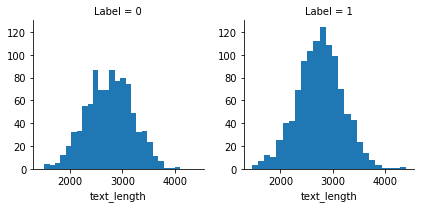

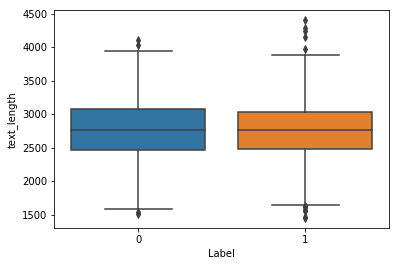

In [10]:
# Plot text length distribution vs. market movement.
g = sns.FacetGrid(data=df_A, col='Label')
g.map(plt.hist, 'text_length', bins=25)
plt.show()
sns.boxplot(x='Label', y='text_length', data=df_A)
plt.show()

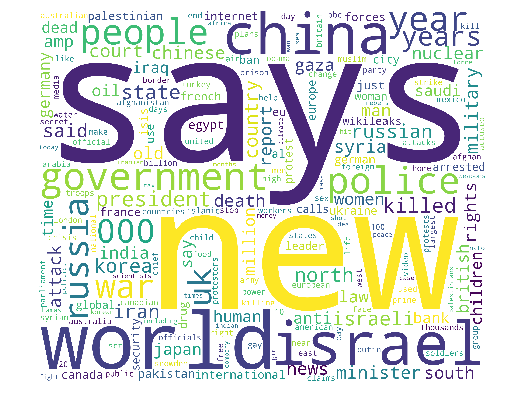

In [11]:
# Run a wordcloud on the positive market days.
pos_txt = []
for row in range(0, len(df_A[df_A['Label'] == 1])):
    pos_txt.append(' '.join(str(x) for x in df_A[df_A['Label'] == 1].iloc[row,2:27]))
    
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vect_A = CountVectorizer(stop_words='english')
pos_trans = vect_A.fit_transform(pos_txt)
pos_count = pos_trans.toarray().sum(axis=0) 

col_names = vect_A.get_feature_names()
pos_dict = dict(zip(col_names, pos_count))

from wordcloud import WordCloud,STOPWORDS
pos_wc = WordCloud(background_color='white', width=3000, height=2500).generate_from_frequencies(pos_dict)
plt.figure(1,figsize=(8,8))
plt.imshow(pos_wc)
plt.axis('off')
plt.show()

In [12]:
# Show the top 10 words and their counts and percentages. 
import operator
pos_sort = sorted(pos_dict.items(), reverse=True, key=operator.itemgetter(1))
df_pos = pd.DataFrame(data=pos_sort, columns=['token', 'count'])
df_pos['percentage'] = df_pos['count']/df_pos['count'].sum()*100
df_pos.head(10)

,token,count,percentage
0,says,1394,0.463377
1,new,1257,0.417837
2,world,1184,0.393571
3,israel,1178,0.391577
4,china,1164,0.386923
5,government,1121,0.372630
6,police,1053,0.350026
7,people,981,0.326092
8,russia,926,0.307810
9,year,891,0.296176


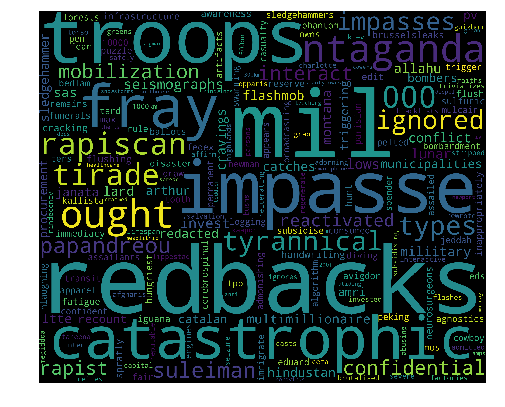

In [13]:
# Run a wordcloud on the negative market days.
neg_txt = []
for row in range(0, len(df_A[df_A['Label'] == 0])):
    neg_txt.append(' '.join(str(x) for x in df_A[df_A['Label'] == 0].iloc[row,2:27]))
    
neg_trans = vect_A.fit_transform(neg_txt)
neg_count = neg_trans.toarray().sum(axis=0) 

neg_dict = dict(zip(col_names, neg_count))

neg_wc = WordCloud(background_color='black', width=3000, height=2500).generate_from_frequencies(neg_dict)
plt.figure(1,figsize=(8,8))
plt.imshow(neg_wc)
plt.axis('off')
plt.show()

In [14]:
# Show the top 10 words and their counts and percentages.
neg_sort = sorted(neg_dict.items(), reverse=True, key=operator.itemgetter(1))
df_neg = pd.DataFrame(data=neg_sort, columns=['token', 'count'])
df_neg['percentage'] = df_neg['count']/df_neg['count'].sum()*100
df_neg.head(10)

,token,count,percentage
0,redbacks,1170,0.447492
1,mil,1168,0.446727
2,troops,1080,0.413070
3,impasse,994,0.380177
4,catastrophic,970,0.370998
5,fray,956,0.365643
6,ntaganda,913,0.349197
7,ought,913,0.349197
8,rapiscan,783,0.299476
9,000,782,0.299093


Train/test split before the CountVectorizer to properly simulate the real world where future data contains words the model has not seen before. If the dataset is vectorized before the train/test split, the document-term matrix would contain every single feature in the training and test sets.

In [15]:
# Set variables.
X = df_A.drop('Label', axis=1) 
y = df_A['Label']

# Split data into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=123)

In [16]:
# Combine the train columns' text into a string.
train_txt = []
for row in range(0, len(X_train.index)):
    train_txt.append(' '.join(str(x) for x in X_train.iloc[row,1:26]))

Create a feature vector that will perform the classification task. Use ski-kit learn's CountVectorizer(), which takes the bag of words approach, to create a matrix of numbers to represent the text. Each news will be separated into words (i.e., tokens) and the number of times each token occurs in the news will be counted. Passing text to CountVectorizer's default settings will convert words to lowercase, remove punctuation, and exclude duplicates and words with less than two letters. 

In [17]:
# Fit the train text into the vectorizer.
vect_A.fit(train_txt)

# Print the tokens and their corresponding column indices.
print(vect_A.vocabulary_)

{'london': 15812, 'police': 20285, 'deleting': 7565, 'tourists': 26930, 'photos': 19934, 'photographing': 19928, 'transport': 27082, 'strictly': 25502, 'forbidden': 10728, 'schoolboy': 23398, 'gets': 11393, 'sarcasm': 23206, 'instead': 13778, 'help': 12468, 'calling': 4723, 'australian': 2812, '911': 1067, 'dies': 7977, 'result': 22384, 'indian': 13490, 'election': 9045, '700m': 927, 'voters': 28518, '28': 507, 'days': 7264, '250': 464, '000': 1, 'world': 29174, 'biggest': 3631, 'democratic': 7608, 'poll': 20310, 'begins': 3415, 'afghan': 1573, 'women': 29122, 'stoned': 25386, 'protest': 20965, 'rape': 21488, 'law': 15269, 'make': 16139, 'cowards': 6745, 'men': 16690, 'brutality': 4411, 'camera': 4745, 'mightier': 16894, 'sword': 26047, 'robert': 22708, 'fisk': 10496, 'trust': 27283, 'cowardly': 6744, 'bbc': 3332, 'pirate': 20055, 'bay': 3320, 'trial': 27164, 'update': 27951, 'verdict': 28272, 'comes': 5958, 'friday': 10976, 'russia': 22969, 'ends': 9285, 'war': 28639, 'chechnya': 5319

In [18]:
# Transform the CountVectorizer object to create a document term matrix populated with token counts.
dtm_A_train = vect_A.transform(train_txt)
print(dtm_A_train)

  (0, 1)	1
  (0, 436)	1
  (0, 464)	1
  (0, 507)	1
  (0, 541)	1
  (0, 659)	2
  (0, 927)	1
  (0, 1053)	1
  (0, 1067)	1
  (0, 1227)	1
  (0, 1573)	2
  (0, 1577)	1
  (0, 2110)	1
  (0, 2432)	1
  (0, 2491)	2
  (0, 2624)	1
  (0, 2733)	1
  (0, 2812)	1
  (0, 2816)	1
  (0, 2830)	1
  (0, 2881)	1
  (0, 3320)	1
  (0, 3332)	1
  (0, 3369)	1
  (0, 3415)	1
  :	:
  (1391, 26462)	1
  (1391, 26518)	1
  (1391, 26623)	1
  (1391, 26665)	1
  (1391, 26694)	1
  (1391, 26806)	1
  (1391, 26839)	1
  (1391, 26920)	1
  (1391, 26982)	1
  (1391, 27141)	1
  (1391, 27239)	1
  (1391, 27365)	1
  (1391, 27488)	3
  (1391, 27490)	1
  (1391, 27740)	1
  (1391, 27759)	1
  (1391, 27769)	1
  (1391, 28047)	1
  (1391, 28299)	1
  (1391, 28424)	1
  (1391, 28431)	1
  (1391, 28682)	1
  (1391, 28780)	1
  (1391, 29188)	1
  (1391, 29361)	1


The resulting matrix is in compressed sparse row format (i.e., sparse matrix), which means only the location and value of non-zero values is saved. For example, the first object (0, 1) indicates the 2nd feature (i.e., token/word) has one instance in the first text.

In [19]:
# Show the equivalent dataframe (i.e., dense matrix version).
pd.DataFrame(dtm_A_train.toarray(), columns=vect_A.get_feature_names())

,00,000,000ft,000new,000rmb,000s,000sq,00am,00pm,01,...,zuckerberg,zuckerburg,zuhair,zuist,zulu,zuma,zumas,zurich,zuyevo,zygi
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this particular dataframe, each row represents a date and each column a token or word, which indicates the default settings in CountVectorizer identified almost 30,000 unique tokens. The numbers represent the token's count on that particular date. 

Token counts are discrete features and are best suited with classification models. The model is trained by creating probability classes based on the tokens' instances in both market directions. As an example:

|Token      | 1   | 0  | Total |
|-----------|-----|----|-------|
| gov't     | 50  | 50 | 100   |
| functions | 75  | 25 | 100   |
| well      | 90  | 10 | 100   |
| total     | 215 | 85 | 300   |

Positive class = 215/300 = 0.717 <br>
Negative class = 85/300 = 0.283

Text that contains "gov't functions well" can be broken down as:

Positive class = (0.717)(50/215)(75/215)(90/215) = 0.024 <br>
Negative class = (0.283)(50/85)(25/85)(10/85) = 0.006

The higher positive class rating indicates the text can be classified in the positive category.

In [20]:
# Concatenate the test columns and convert to a document term matrix.
test_txt = []
for row in range(0, len(X_test.index)):
    test_txt.append(' '.join(str(x) for x in X_test.iloc[row,1:26]))

dtm_A_test = vect_A.transform(test_txt)

In [21]:
# Confirm train and test set sizes before modeling.
print('Train features: ', dtm_A_train.shape)
print('Train target: ', y_train.shape)
print('Test features: ', dtm_A_test.shape)
print('Test target: ', y_test.shape)

Train features:  (1392, 29600)
Train target:  (1392,)
Test features:  (597, 29600)
Test target:  (597,)


## B. Models

Run and compare the accuracy of different classification models.

### 1. Naive Bayes

In [22]:
# Fit the model.
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(dtm_A_train, y_train)

# Make predictions.
pred_B1 = mnb.predict(dtm_A_test)

# Classification report.
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_B1))

             precision    recall  f1-score   support

          0       0.51      0.31      0.38       282
          1       0.54      0.73      0.62       315

avg / total       0.53      0.53      0.51       597



### 2. Logistic Regression

In [23]:
# Fit the model.
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(dtm_A_train, y_train)

# Make predictions.
pred_B2 = logr.predict(dtm_A_test)

# Classification report.
print(classification_report(y_test, pred_B2))

             precision    recall  f1-score   support

          0       0.49      0.45      0.47       282
          1       0.54      0.58      0.56       315

avg / total       0.52      0.52      0.52       597



### 3. Random Forest

In [24]:
# Fit the model.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(dtm_A_train, y_train)

# Make predictions.
pred_B3 = rfc.predict(dtm_A_test)

# Classification report.
print(classification_report(y_test, pred_B3))

             precision    recall  f1-score   support

          0       0.47      0.54      0.50       282
          1       0.52      0.45      0.48       315

avg / total       0.49      0.49      0.49       597



### 4. Gradient Boost

In [25]:
# Fit the model.
from sklearn import ensemble
gbc = ensemble.GradientBoostingClassifier(n_estimators=500, max_depth=2, loss='deviance')
gbc.fit(dtm_A_train, y_train)

# Make predictions.
pred_B4 = gbc.predict(dtm_A_test)

# Classification report.
print(classification_report(y_test, pred_B4))

             precision    recall  f1-score   support

          0       0.48      0.36      0.41       282
          1       0.53      0.65      0.59       315

avg / total       0.51      0.51      0.50       597



### 5. KNN

In [26]:
# Fit the model.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knn.fit(dtm_A_train, y_train)

# Make predictions.
pred_B5 = knn.predict(dtm_A_test)

# Classification report.
print(classification_report(y_test, pred_B5))

             precision    recall  f1-score   support

          0       0.48      0.28      0.36       282
          1       0.53      0.73      0.62       315

avg / total       0.51      0.52      0.49       597



## C. Modified Models

Run modifications on the models to determine if accuracy can be improved. To save on computation costs, only the top performing model(s) from the preceding section will be modified.

### 1. TfidfVectorizer

TfidfVectorizer is equivalent to CountVectorizer followed by TfidfTransformer, which transforms a count matrix to a normalized tf or tf-idf representation. Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval that has also found good use in document classification. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

In [27]:
# Set parameters.
vect_C1 = TfidfVectorizer()

# Fit the TfidfVectorizer and transform the train set.
dtm_C1_train = vect_C1.fit_transform(train_txt)
print('Shape: ', dtm_C1_train.shape, '\n')

# Fit the gradient boost model.
mnb.fit(dtm_C1_train, y_train)

# Transform the test set.
dtm_C1_test = vect_C1.transform(test_txt)

# Make predictions.
pred_C1 = mnb.predict(dtm_C1_test)

# Classification report.
print(classification_report(y_test, pred_C1))

Shape:  (1392, 29893) 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       282
          1       0.53      1.00      0.69       315

avg / total       0.28      0.53      0.36       597



C:\Users\James\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2. SelectKBest

Use an automated feature selection method that narrows down the features from the dense matrix version of the original CountVectorizer. The resulting features, which will be the most correlated to the target, will then be fed into the model.

In [28]:
# Convert the train and test document term matrices to their dense matrix versions.
df_C2_train = pd.DataFrame(dtm_A_train.toarray(), columns=vect_A.get_feature_names())
df_C2_test = pd.DataFrame(dtm_A_test.toarray(), columns=vect_A.get_feature_names())

# Run Pipeline to initiate SelectKBest with the train set, which is carried over to the test set.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
mnb_pipe = Pipeline([('reducer', SelectKBest(chi2, k=int(1/16*(df_C2_train.shape[1])))), ('clf', mnb)])

# Fit, predict and print classification report.
mnb_pipe.fit(df_C2_train, y_train)
pred_C2 = mnb_pipe.predict(df_C2_test)
print(classification_report(y_test, pred_C2))

             precision    recall  f1-score   support

          0       0.53      0.49      0.51       282
          1       0.57      0.61      0.59       315

avg / total       0.55      0.55      0.55       597



### 3. Grid Search

GridSearchCV is a hyper-parameter fine tuning technique that exhaustively considers and searches for the optimum parameter combination, which are passed as the model's arguments. 

#### a. Naive Bayes

In [29]:
# Set the range or values of the parameters the GridSearchCV will iterate over.
from sklearn.model_selection import GridSearchCV
param_mnb = {'alpha': [0.1, 1.0],
             'fit_prior': ['True', 'False']}
gs_mnb = GridSearchCV(mnb, param_mnb, cv= 5)
gs_mnb.fit(dtm_A_train, y_train)
print(gs_mnb.best_params_)

{'alpha': 1.0, 'fit_prior': 'True'}


The optimum combination is the model's default settings, therefore, no further improvements can be made.

#### b. TfidfVectorizer

In [30]:
# Set parameter range.
pipe_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', mnb)])
param_tfidf = {'tfidf__min_df': [0.01, 0.05],
               'tfidf__max_df': [0.95, 0.99],
               'tfidf__ngram_range': [(1, 1), (1, 2), (2, 1), (2, 2)]}
gs_tfidf = GridSearchCV(pipe_tfidf, param_tfidf, cv=5)
gs_tfidf.fit(train_txt, y_train)
print (gs_tfidf.best_params_)

{'tfidf__max_df': 0.95, 'tfidf__min_df': 0.05, 'tfidf__ngram_range': (2, 2)}


In [31]:
# Run the TfidfVectorizer with the new parameters.
vect_C3 = TfidfVectorizer(min_df=0.05, max_df=0.95, ngram_range = (2, 2))
dtm_C3_train = vect_C3.fit_transform(train_txt)
print('Shape: ', dtm_C3_train.shape, '\n')
mnb.fit(dtm_C3_train, y_train)
dtm_C3_test = vect_C3.transform(test_txt)
pred_C3 = mnb.predict(dtm_C3_test)
print(classification_report(y_test, pred_C3))

Shape:  (1392, 283) 

             precision    recall  f1-score   support

          0       0.55      0.16      0.25       282
          1       0.54      0.88      0.67       315

avg / total       0.54      0.54      0.47       597



The updated parameters reduced the tokens from almost 30,000 to over 280, a 99% decrease, but the model's accuracy barely improved.

## D. Conclusion

Observations:<br>
Models performed no better than random guessing.<br>
Modifications didn't do much to improve accuracy.<br>
Practical implication: TfidfVectorizer was 100% accurate on positive market movement.

For improvement:<br>
Conduct a more exhaustive grid search.<br>
Design additional features that are specifically suited to the problem.<br>
Use a more exhaustive stopwords list.<br>
Normalize the corpus.<br>

For further study:<br>
Investigate a date + n approach, where n is the number of days or periods.<br>
Use multiple sources of news.